In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

%matplotlib inline

In [65]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
x_train shape: (60000, 28, 28, 1)


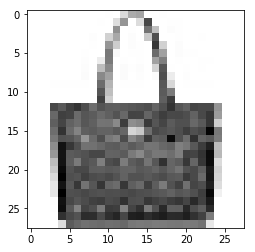

In [66]:
plt.imshow(x_train[768,:,:], cmap='Greys')
print(type(x_train))
print(x_train.shape)
print(y_train.shape)

#reshaping to add the channel dim
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1], x_train.shape[2], 1))
# y_train = y_train.reshape((y_train.shape[0],y_train.shape[1], y_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1], x_test.shape[2], 1))
# y_test = y_test.reshape((y_test.shape[0],y_test.shape[1], y_test.shape[2], 1))

print("x_train shape: {}".format(x_train.shape))

In [0]:
class CustomCallback(tf.keras.callbacks.Callback):
    saved_logs = []
    def on_train_begin(self, logs=None):
        self.saved_logs = []
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc')>0.9:
            print("\nReached more than 90% accuracy. Ending the training!")
            self.model.stop_training = True
        
    def on_batch_end(self, batch, logs={}):
        self.saved_logs.append(logs)

In [68]:
model = tf.keras.models.Sequential([
#         tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(kernel_size=[5,5], filters=32, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=[5,5], filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

mycallback = CustomCallback()

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=512, epochs=5, validation_split=0.0, callbacks=[mycallback])
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.6555 - acc: 0.7659
Epoch 2/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3929 - acc: 0.8593
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3276 - acc: 0.8822
Epoch 4/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2956 - acc: 0.8926
Epoch 5/5
58880/60000 [============================>.] - ETA: 0s - loss: 0.2714 - acc: 0.9024
Reached more than 90% accuracy. Ending the training!
10000/10000 [==============================] - 1s 71us/sample - loss: 0.3315 - acc: 0.8783


[0.3315338686943054, 0.8783]

[0.1015625, 0.23242188, 0.36002603, 0.40966797, 0.42382812, 0.44433594, 0.46958706, 0.48779297, 0.50672746, 0.5263672, 0.5403054, 0.5485026, 0.5605469, 0.56961495, 0.5769531, 0.5839844, 0.59329045, 0.601454, 0.6089638, 0.6134766, 0.6191406, 0.62349075, 0.628142, 0.63151044, 0.6364844, 0.64032453, 0.6447483, 0.6475307, 0.65126616, 0.655013, 0.65864414, 0.6619873, 0.6656605, 0.66808367, 0.67081475, 0.67388237, 0.6760452, 0.6778886, 0.6799379, 0.6816406, 0.6834985, 0.68559337, 0.6875, 0.68927556, 0.6903646, 0.69268, 0.6940658, 0.6960449, 0.69782364, 0.6996875, 0.7009038, 0.702186, 0.70364094, 0.7052228, 0.70660514, 0.7079032, 0.70977247, 0.7112069, 0.7126258, 0.71376956, 0.71532404, 0.71622986, 0.7175409, 0.7189331, 0.720012, 0.7220052, 0.7235016, 0.7251264, 0.7265625, 0.72765064, 0.7287082, 0.72957355, 0.7304152, 0.73128694, 0.7325521, 0.7336297, 0.73470473, 0.735627, 0.7366495, 0.73737794, 0.7384259, 0.73940074, 0.7400226, 0.7411412, 0.74248624, 0.7432549, 0.74443245, 0.7454501, 0.74640

Text(0.5, 0, 'batches')

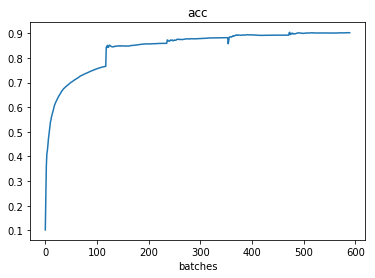

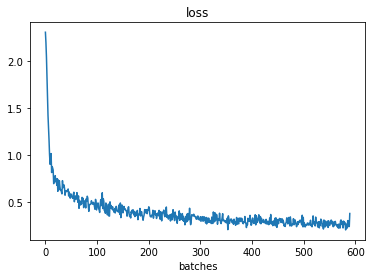

In [69]:
acc_log = [mycallback.saved_logs[i]['acc'] for i in range(len(mycallback.saved_logs))]
loss_log = [mycallback.saved_logs[i]['loss'] for i in range(len(mycallback.saved_logs))]

plt.figure()
# plt.subplot(121)
plt.plot([i for i in range(len(mycallback.saved_logs))], acc_log)
plt.title('acc')
plt.xlabel('batches')

plt.figure()
# plt.subplot(122)
plt.plot([i for i in range(len(mycallback.saved_logs))], loss_log)
plt.title('loss')
plt.xlabel('batches')

In [0]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(v_xs, v_ys):
    cls_true = v_ys
    cls_pred = np.argmax(model.predict(v_xs), axis=1).T
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    
    plt.figure()
#     plt.subplot(121)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Print the confusion matrix as text.
#     print(cm)
    # Plot the confusion matrix as an image.

10000/10000 [==============================] - 0s 49us/sample
prediction for this image: 4
Correct classification is: 4


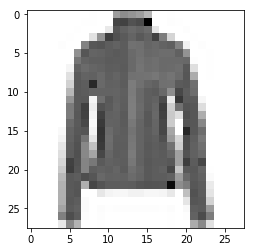

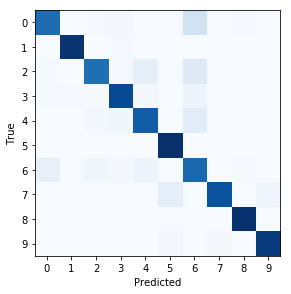

In [77]:
img_no = 1234

plt.figure()
plt.imshow(x_test[img_no,:,:,0], cmap='Greys')
pred = np.argmax(model.predict(x_test, batch_size=None, verbose=1), axis=1)[img_no]
print("prediction for this image: {}".format(pred))
print("Correct classification is: {}".format(y_test[img_no]))

print_confusion_matrix(x_test, y_test.reshape((-1, 1)))